In [1]:
import numpy as np
import pandas as pd
import altair as alt
from altair_saver import save

Download the offender_profile data set

In [2]:
!python download_data.py --url="http://www.csc-scc.gc.ca/005/opendata-donneesouvertes/Open%20Data%20File%2020170409%20v3%20(English).csv" --file_path="../data/raw/offender_profile.csv"

In [3]:
df_init = pd.read_csv('../data/raw/offender_profile.csv', sep=r'\s*,\s*',
                           header=1, encoding='ascii', engine='python')

alt.data_transformers.disable_max_rows() #normally, altair limits it to 5K rows
alt.renderers.enable('png')

RendererRegistry.enable('png')

In [4]:
df = df_init
df

,Number,Race,Race Grouping,Gender,Age,Incarcerated/Supervised,Supervision Type,Sentence Type,Aggregate Sentence Length,Province,Marital Status,Religion
0,1,WHITE,Non Indigenous,MALE,35,Incarcerated,NaN,DETERMINATE,1095,BRITISH COLUMBIA,SINGLE,CATH NON-SPEC
1,2,WHITE,Non Indigenous,MALE,59,Supervised,SR,DETERMINATE,731,QUEBEC,SINGLE,PROT NON-SPEC
2,3,METIS,Indigenous,MALE,39,Supervised,FP,DETERMINATE,912,ONTARIO,UNKNOWN,NaN
3,4,NORTH AMERICAN,Indigenous,MALE,20,Incarcerated,NaN,DETERMINATE,1233,MANITOBA,COMMON LAW,CHRI NON SPEC
4,5,NORTH AMERICAN,Indigenous,MALE,47,Supervised,FP,INDETERMINATE,0,ONTARIO,SINGLE,NONE
...,...,...,...,...,...,...,...,...,...,...,...,...
22765,22766,NORTH AMERICAN,Indigenous,FEMALE,58,Incarcerated,NaN,INDETERMINATE,0,QUEBEC,DIVORCED,BAPTIST
22766,22767,NORTH AMERICAN,Indigenous,MALE,37,Supervised,FP,DETERMINATE,912,MANITOBA,MARRIED,CATHOLIC - ROMA
22767,22768,WHITE,Non Indigenous,MALE,50,Incarcerated,NaN,INDETERMINATE,0,ALBERTA,SINGLE,NONE
22768,22769,WHITE,Non Indigenous,MALE,35,Supervised,FP,DETERMINATE,1277,ALBERTA,DIVORCED,NONE


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Number                     22770 non-null  int64 
 1   Race                       22087 non-null  object
 2   Race Grouping              22770 non-null  object
 3   Gender                     22770 non-null  object
 4   Age                        22770 non-null  int64 
 5   Incarcerated/Supervised    22770 non-null  object
 6   Supervision Type           8638 non-null   object
 7   Sentence Type              22770 non-null  object
 8   Aggregate Sentence Length  22770 non-null  int64 
 9   Province                   22770 non-null  object
 10  Marital Status             22770 non-null  object
 11  Religion                   20387 non-null  object
dtypes: int64(3), object(9)
memory usage: 2.1+ MB


Here we can see that the following columns have missing values:
- **Race**: we will not be filling it with any values such as median / prev / next etc
- **Supervision Type**: we will likely drop this column anyway as supervision is set up after the sentencing, thus can not be a predictor
- **Religion**: we will not be filling it with any values such as median / prev / next etc

In later stages, we will decide whether it makes sense to drop the rows with missing values. They may also be treated as "unreported" which can be inherently telling, since these columns are self reported. Further analysis is beyond the scope of EDA and will be address after Milestone 1.

In [6]:
df.describe()

,Number,Age,Aggregate Sentence Length
count,22770.000000,22770.000000,22770.000000
mean,11385.500000,41.954150,1416.379622
std,6573.277151,14.010167,1653.111098
min,1.000000,18.000000,0.000000
25%,5693.250000,30.000000,730.000000
50%,11385.500000,40.000000,1096.000000
75%,17077.750000,52.000000,1826.000000
max,22770.000000,94.000000,43761.000000


We don't really have meaningful number columns beyond the target (Aggregate Sentence Length). Almost all our features are categorical or binary.

In [7]:
df.head()

,Number,Race,Race Grouping,Gender,Age,Incarcerated/Supervised,Supervision Type,Sentence Type,Aggregate Sentence Length,Province,Marital Status,Religion
0,1,WHITE,Non Indigenous,MALE,35,Incarcerated,NaN,DETERMINATE,1095,BRITISH COLUMBIA,SINGLE,CATH NON-SPEC
1,2,WHITE,Non Indigenous,MALE,59,Supervised,SR,DETERMINATE,731,QUEBEC,SINGLE,PROT NON-SPEC
2,3,METIS,Indigenous,MALE,39,Supervised,FP,DETERMINATE,912,ONTARIO,UNKNOWN,NaN
3,4,NORTH AMERICAN,Indigenous,MALE,20,Incarcerated,NaN,DETERMINATE,1233,MANITOBA,COMMON LAW,CHRI NON SPEC
4,5,NORTH AMERICAN,Indigenous,MALE,47,Supervised,FP,INDETERMINATE,0,ONTARIO,SINGLE,NONE


In [8]:
df.tail()

,Number,Race,Race Grouping,Gender,Age,Incarcerated/Supervised,Supervision Type,Sentence Type,Aggregate Sentence Length,Province,Marital Status,Religion
22765,22766,NORTH AMERICAN,Indigenous,FEMALE,58,Incarcerated,NaN,INDETERMINATE,0,QUEBEC,DIVORCED,BAPTIST
22766,22767,NORTH AMERICAN,Indigenous,MALE,37,Supervised,FP,DETERMINATE,912,MANITOBA,MARRIED,CATHOLIC - ROMA
22767,22768,WHITE,Non Indigenous,MALE,50,Incarcerated,NaN,INDETERMINATE,0,ALBERTA,SINGLE,NONE
22768,22769,WHITE,Non Indigenous,MALE,35,Supervised,FP,DETERMINATE,1277,ALBERTA,DIVORCED,NONE
22769,22770,WHITE,Non Indigenous,FEMALE,62,Supervised,FP,DETERMINATE,1096,BRITISH COLUMBIA,MARRIED,ANGLICAN(EPIS.


In [9]:
df = df_init.loc[df_init['Sentence Type'] == 'DETERMINATE']

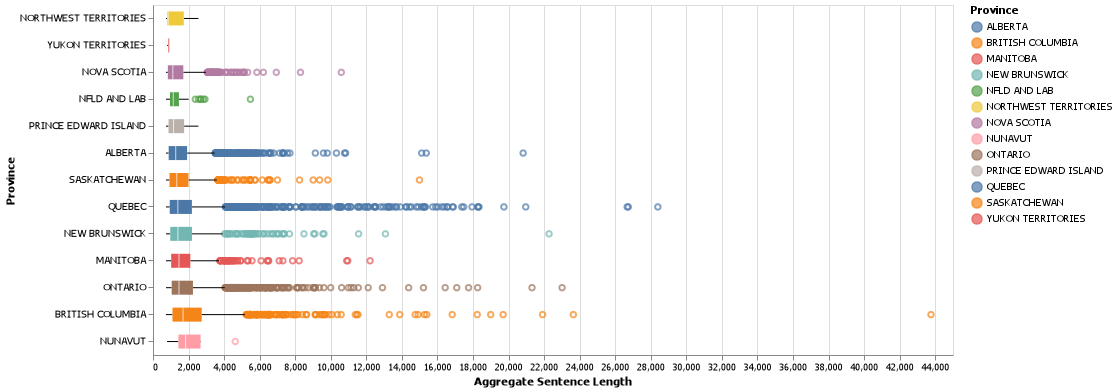

In [10]:
sentence_by_prov = df.groupby('Province')['Aggregate Sentence Length'].median().sort_values().index.tolist()

ratio_boxplots = alt.Chart(df).mark_boxplot().encode(
    x = alt.X('Aggregate Sentence Length', type='quantitative'),
    y = alt.Y('Province', sort = sentence_by_prov), 
    color = 'Province'
).properties(
    height = 350,
    width = 800
)

ratio_boxplots

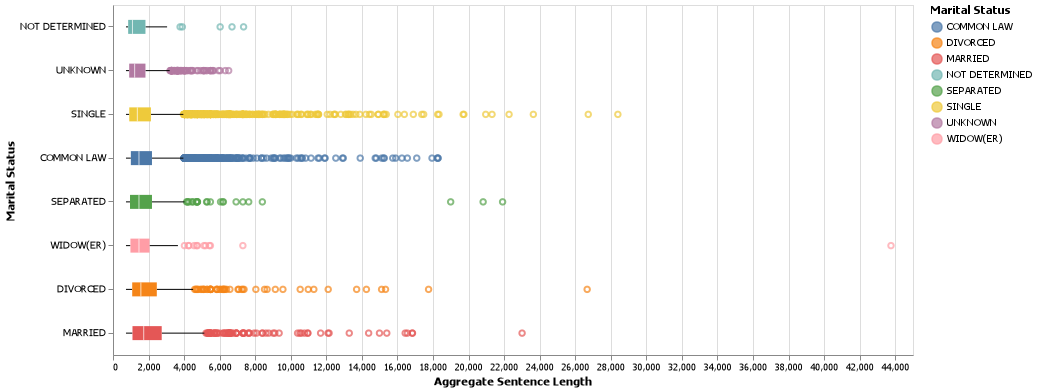

In [11]:
sentence_by_mar = df.groupby('Marital Status')['Aggregate Sentence Length'].median().sort_values().index.tolist()

ratio_boxplots = alt.Chart(df).mark_boxplot().encode(
    x = alt.X('Aggregate Sentence Length', type='quantitative'),
    y = alt.Y('Marital Status', sort = sentence_by_mar), 
    color = 'Marital Status'
).properties(
    height = 350,
    width = 800
)

ratio_boxplots

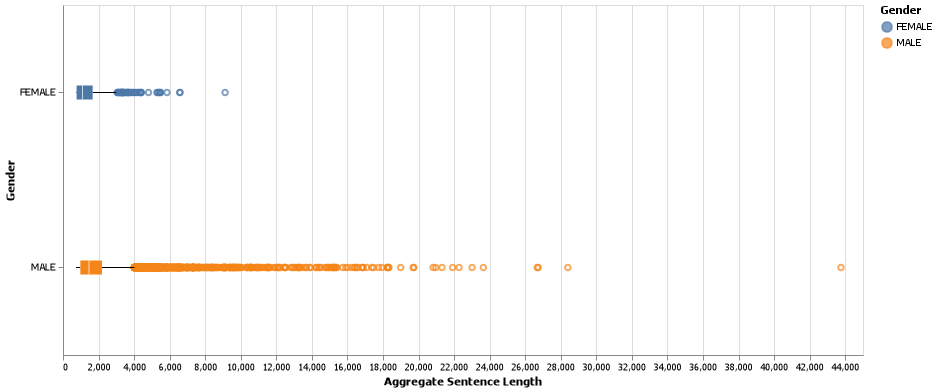

In [12]:
ratio_boxplots = alt.Chart(df).mark_boxplot().encode(
    x = alt.X('Aggregate Sentence Length', type='quantitative'),
    y = alt.Y('Gender'), 
    color = 'Gender'
).properties(
    height = 350,
    width = 800
)

ratio_boxplots

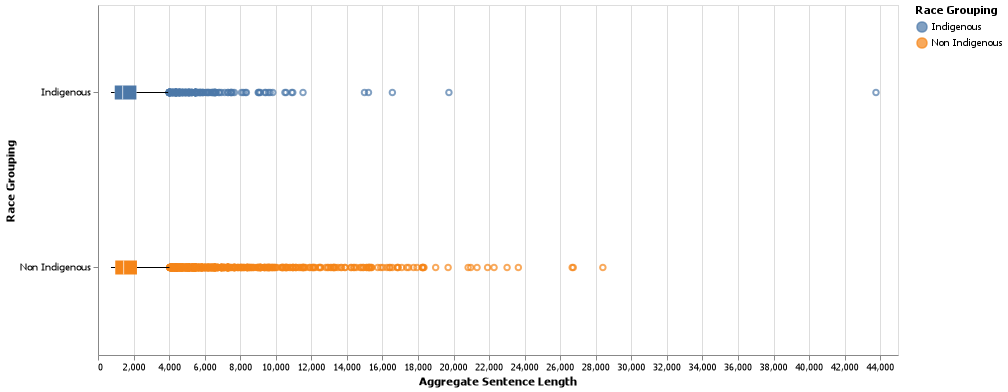

In [13]:
ratio_boxplots = alt.Chart(df).mark_boxplot().encode(
    x = alt.X('Aggregate Sentence Length', type='quantitative'),
    y = alt.Y('Race Grouping'), 
    color = 'Race Grouping'
).properties(
    height = 350,
    width = 800
)

ratio_boxplots

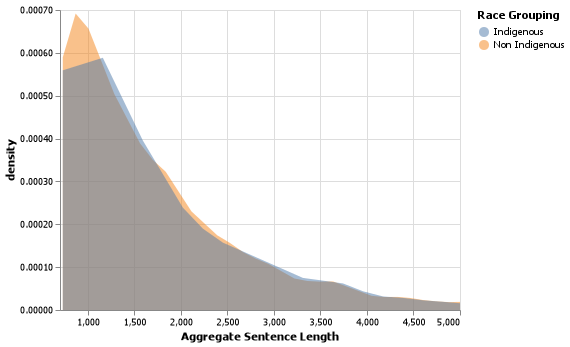

In [14]:
ratio_violins = alt.Chart(df).transform_density(
    'Aggregate Sentence Length',
    groupby=['Race Grouping'],
    as_=['Aggregate Sentence Length', 'density'],
).mark_area(
    opacity=0.5,
    clip=True
).encode(
    x=alt.X('Aggregate Sentence Length', scale=alt.Scale(domain=[700, 5000])),
    y='density:Q',
    color='Race Grouping'
)

ratio_violins

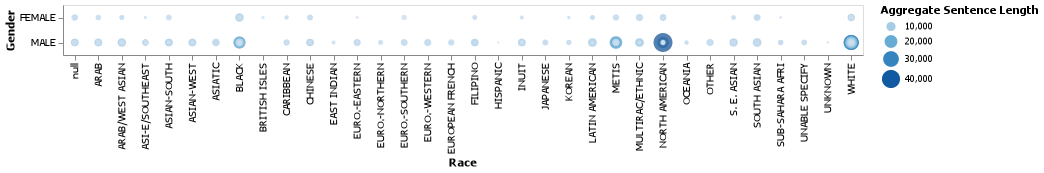

In [15]:
race_gender_count_chart = alt.Chart(df).mark_circle().encode(
    x = alt.X('Race'),
    y = alt.Y('Gender'),
    size = alt.Size('Aggregate Sentence Length'),
    color = alt.Color('Aggregate Sentence Length')
).properties(
    height = 50,
    width = 800
)


# Show the plot
race_gender_count_chart

In [16]:
print(df['Religion'].value_counts())

CATH NON-SPEC      4006
NONE               2569
CATHOLIC - ROMA    1524
CHRI NON SPEC      1350
MUSLIM             1060
NATIVE SPIRITUA     936
NOT STATED          761
PROT NON-SPEC       394
BUDDHIST            340
ANGLICAN(EPIS.      316
ATHEIST             215
OTHER               195
BAPTIST             147
SIKH                127
JUDAISM             116
RASTAFARIAN         114
UNITED CHURCH        91
CHRISTIAN REFOR      79
WICCA                71
CHRISTIAN & MIS      59
SEVENTH DAY ADV      57
PENTECOSTAL ASS      57
CATHOLIC - NATI      53
PAGAN                53
AGNOSTIC             48
HINDU                47
LUTHERAN             46
CATHOLIC - GREE      43
GREEK ORTHODOX       39
JEHOVAH'S WITNE      39
PRESBYTERIAN         34
PENTECOSTAL (4       29
NAT SPIRIT PROT      24
MORMON (LATTER       22
MENNONITE            15
SALVATION ARMY       14
CHRIST. SCIENCE      11
SUFIISM              10
RUSSIAN ORTHODO       9
MAHAYANA BUDD         6
DRUIDRY PAGAN         6
ASATRUAR PAGAN  

In [17]:
print(df['Race'].value_counts())

WHITE              9678
NORTH AMERICAN     2731
BLACK              1346
METIS              1180
LATIN AMERICAN      201
S. E. ASIAN         168
ARAB                163
INUIT               161
ASI-E/SOUTHEAST     151
MULTIRAC/ETHNIC     140
ARAB/WEST ASIAN     125
ASIAN-SOUTH         100
SOUTH ASIAN          87
CHINESE              86
FILIPINO             67
CARIBBEAN            65
EURO.-SOUTHERN       31
EURO.-EASTERN        30
OTHER                27
SUB-SAHARA AFRI      26
ASIAN-WEST           18
UNABLE SPECIFY       16
KOREAN               12
EURO.-WESTERN        10
ASIATIC               6
OCEANIA               5
JAPANESE              5
EURO.-NORTHERN        3
EAST INDIAN           2
EUROPEAN FRENCH       2
BRITISH ISLES         1
HISPANIC              1
UNKNOWN               1
Name: Race, dtype: int64


In [18]:
print(df['Province'].value_counts())

ONTARIO                  4337
QUEBEC                   4144
ALBERTA                  2968
BRITISH COLUMBIA         2039
SASKATCHEWAN             1057
MANITOBA                 1003
NEW BRUNSWICK             863
NOVA SCOTIA               755
NFLD AND LAB               86
PRINCE EDWARD ISLAND       23
NORTHWEST TERRITORIES       7
NUNAVUT                     4
YUKON TERRITORIES           3
Name: Province, dtype: int64


In [19]:
print(df['Race Grouping'].value_counts())

Non Indigenous    13217
Indigenous         4072
Name: Race Grouping, dtype: int64


In [20]:
print(df['Marital Status'].value_counts())

SINGLE            7759
COMMON LAW        5016
UNKNOWN           1652
MARRIED           1409
DIVORCED           688
SEPARATED          545
WIDOW(ER)          123
NOT DETERMINED      97
Name: Marital Status, dtype: int64


In [21]:
df_age = df.groupby('Age')['Aggregate Sentence Length'].mean().reset_index()
df_age

,Age,Aggregate Sentence Length
0,18,1233.777778
1,19,1078.363636
2,20,1165.615894
3,21,1276.566524
4,22,1329.578512
...,...,...
66,84,2711.600000
67,85,2216.500000
68,86,1818.000000
69,88,2190.500000


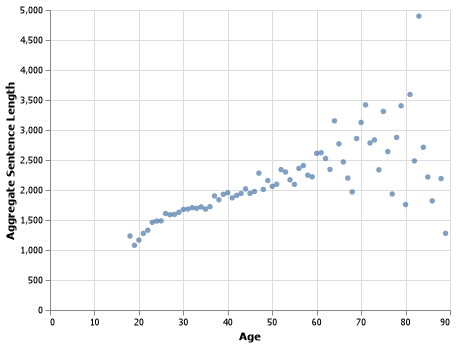

In [22]:
age_sentence = alt.Chart(df_age).mark_circle().encode(
    x = 'Age',
    y = alt.Y('Aggregate Sentence Length'))
age_sentence